## Setup

## Libraries

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import statsmodels.formula.api as smf
import pandas as pd
import plotly.express as px
from geopy.geocoders import Nominatim
# from pandarallel import pandarallel

# pandarallel.initialize()

## Viz options

In [3]:
rc('font',**{'family':'serif','serif':['Avant Garde']} )

## Application 1: Employee's job satisfaction and intent to quit in the context of employer size

#### Goal

The working hypothesis is that lower levels of job satisfaction ($x$) increases the
chances of turnover, i.e., intent to quit ($y$).

On top of this, we think the negative relationship between  $x$ and $y$ depends
on the size of the employer. The intuition is that large employers have an 
internal labor market that allows individuals to change job positions (get a
better fit with the task) without quitting the employment relation.

The **goal** is showing how the relationship between job satisfaction and 
intent to quit (as estimated via OLS) changes as firm size increases.

#### Data simulation

We simulate multiple datasets involving the following variables:

+   job satisfaction - the extent to which an employee is happy with his/her job
    (let's assume we have Likert scale data; legend: 1 = not at all, 5 = to a 
    great extent)
+   intent to quit - the extent to which an employee considers the possibility 
    to quit the current job (let's assume we have Likert scale data; legend: 1 
    = not at all, 5 = to a great extent)
+   age (in years)
+   organizational tenure (years spent working for the employer)
   
Let's assume that all variables have been transformed into z-scores.
   
Each dataset we simulate reflect the following cohorts of employers:

+   micro firms: 1 - 5 employees
+   small firms: 6 - 25 employees
+   medium firms: 26 - 100 employees
+   large firms: 100 - 500 employees
+   very large firms: 500 + 

In [4]:
# sample size
num_samples = 1000

# variables' mean 
mu = np.repeat(0, 4)

# names
names = ['job_sat', 'int_qui', 'age', 'org_tnr']

##### Micro firms

In [5]:
# the desired covariance matrix.
r = np.array([
        [  1.00, -0.40, -0.03,  0.11],
        [ -0.40,  1.00, -0.05, -0.09],
        [ -0.03, -0.05,  1.00,  0.05],
        [  0.11, -0.09,  0.05,  1.00]
    ])

# generate the random samples.
df_1_5 = pd.DataFrame(np.random.multivariate_normal(mu, r, size=num_samples),
                      columns=names)

# expand
df_1_5.loc[:, 'cohort'] = 'micro'
df_1_5.loc[:, 'firm_size'] = np.random.randint(low=1, high=5, size=num_samples)

In [6]:
df_1_5.head()

,job_sat,int_qui,age,org_tnr,cohort,firm_size
0,0.225828,1.708932,-1.280049,-0.205141,micro,2
1,-1.081916,0.298600,-0.208801,0.602675,micro,2
2,-0.140995,-0.371413,0.546745,-2.186581,micro,1
3,-0.586335,0.402028,0.772339,1.088441,micro,4
4,1.783387,0.658606,0.883487,0.459002,micro,4


##### Small firms

In [7]:
# the desired covariance matrix.
r = np.array([
        [  1.00, -0.30, -0.03,  0.11],
        [ -0.30,  1.00, -0.05, -0.09],
        [ -0.03, -0.05,  1.00,  0.05],
        [  0.11, -0.09,  0.05,  1.00]
    ])

# generate the random samples.
df_6_25 = pd.DataFrame(np.random.multivariate_normal(mu, r, size=num_samples),
                       columns=names)

# expand
df_6_25.loc[:, 'cohort'] = 'small'
df_6_25.loc[:, 'firm_size'] = np.random.randint(low=6,
                                                high=25,
                                                size=num_samples)

In [8]:
df_6_25.head()

,job_sat,int_qui,age,org_tnr,cohort,firm_size
0,-0.543237,-0.700473,0.783887,0.164107,small,12
1,0.004872,0.367934,-1.532156,1.582211,small,7
2,1.160606,0.517257,-1.258346,0.459584,small,22
3,-0.306559,1.108617,0.733614,-1.393417,small,10
4,0.856733,-2.928184,0.454433,0.282242,small,21


##### Medium firms

In [9]:
# the desired covariance matrix.
r = np.array([
        [  1.00, -0.25, -0.03,  0.11],
        [ -0.25,  1.00, -0.05, -0.09],
        [ -0.03, -0.05,  1.00,  0.05],
        [  0.11, -0.09,  0.05,  1.00]
    ])

# generate the random samples.
df_26_100 = pd.DataFrame(np.random.multivariate_normal(mu, r, size=num_samples),
                         columns=names)

# expand
df_26_100.loc[:, 'cohort'] = 'medium'
df_26_100.loc[:, 'firm_size'] = np.random.randint(low=26,
                                                  high=100,
                                                  size=num_samples)

##### Large firms

In [10]:
# the desired covariance matrix.
r = np.array([
        [  1.00, -0.20, -0.03,  0.11],
        [ -0.20,  1.00, -0.05, -0.09],
        [ -0.03, -0.05,  1.00,  0.05],
        [  0.11, -0.09,  0.05,  1.00]
    ])

# generate the random samples.
df_101_500 = pd.DataFrame(np.random.multivariate_normal(mu, r, size=num_samples),
                          columns=names)

# expand
df_101_500.loc[:, 'cohort'] = 'large'
df_101_500.loc[:, 'firm_size'] = np.random.randint(low=101, high=500,
                                                size=num_samples)

##### Very large firms

In [11]:
# the desired covariance matrix.
r = np.array([
        [  1.00, -0.15, -0.03,  0.11],
        [ -0.15,  1.00, -0.05, -0.09],
        [ -0.03, -0.05,  1.00,  0.05],
        [  0.11, -0.09,  0.05,  1.00]
    ])

# generate the random samples.
df_501_ = pd.DataFrame(np.random.multivariate_normal(mu, r, size=num_samples),
                       columns=names)

# expand
df_501_.loc[:, 'cohort'] = 'very large'
df_501_.loc[:, 'firm_size'] = np.random.randint(low=501, high=2000,
                                                size=num_samples)

###### Data preparation

In [12]:
df = pd.concat([df_1_5, df_6_25, df_26_100, df_101_500, df_501_],
               axis=0)
df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   job_sat    5000 non-null   float64
 1   int_qui    5000 non-null   float64
 2   age        5000 non-null   float64
 3   org_tnr    5000 non-null   float64
 4   cohort     5000 non-null   object 
 5   firm_size  5000 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 273.4+ KB


,job_sat,int_qui,age,org_tnr,cohort,firm_size
0,0.225828,1.708932,-1.280049,-0.205141,micro,2
1,-1.081916,0.298600,-0.208801,0.602675,micro,2
2,-0.140995,-0.371413,0.546745,-2.186581,micro,1
3,-0.586335,0.402028,0.772339,1.088441,micro,4
4,1.783387,0.658606,0.883487,0.459002,micro,4


### Visualization

To get some intuition about the data, we plot the scatter plot between intent to quit and job satisfaction based on the different cohort types.

In [13]:
# use different colors for each cohort
fig = px.scatter(df, x='job_sat', y='int_qui', color='cohort',height=500,width=1000)

fig.update_layout(
    title='Job Satisfaction by Firm Size',
    xaxis_title='Job Satisfaction',
    yaxis_title='Intent to Quit',
    title_x=0.5,
)
fig.show()

However, since the dots are interwoven, we cannot see the clear pattern. To get a better idea, we can draw them independently.

/var/folders/75/jx2xyqnd3k74bnk7xc0ps4w80000gn/T/ipykernel_3685/2217426976.py:21: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Avant Garde
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Avant Garde
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Avant Garde


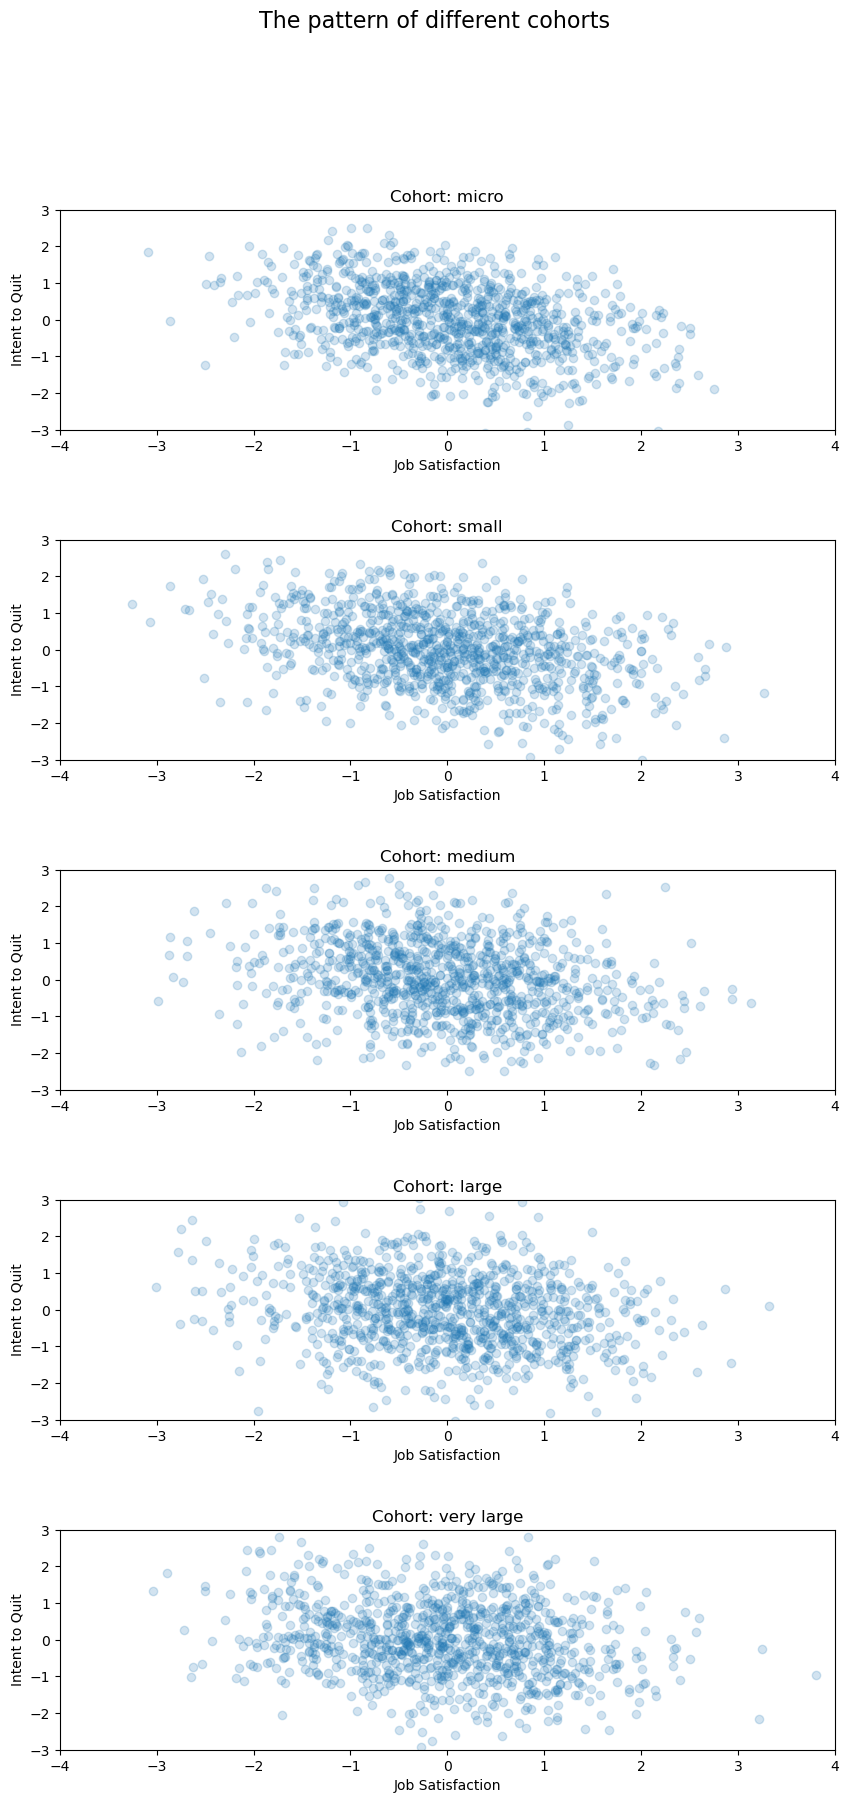

In [14]:
# create the figure
fig, axs = plt.subplots(5,1, figsize=(10,20))

# set the title for the graph
fig.suptitle('The pattern of different cohorts', fontsize=16)

# generate the scatter plot for each cohort
for ind,cohort in enumerate(df.cohort.unique()):
    sub_cohort = df[df.cohort == cohort]
    axs[ind].scatter(sub_cohort['job_sat'], sub_cohort['int_qui'],alpha=0.2)
    axs[ind].set_title('Cohort: ' + cohort)
    axs[ind].set_xlim(-4,4)
    axs[ind].set_xlabel('Job Satisfaction', fontsize=10)
    axs[ind].set_ylim(-3,3)
    axs[ind].set_ylabel('Intent to Quit', fontsize=10)
    
# adjust the space between the plots
plt.subplots_adjust(hspace=0.5)

# show the figure
fig.show()


### Regression analysis
After we find some patterns in the data, we can proceed to the regression analysis. We use OLS to estimate the relationship between job satisfaction, dummy variables of cohort types and intent to quit. However, we can not see a significant result. Thus, we can reduce the type of cohort to two types: large and small firms.

In [15]:
# get dummy variables for the cohort
df = pd.get_dummies(df, columns=['cohort'])

# rename the cohort_very large to cohort_very_large to avoid the error in the model
df.rename(columns={'cohort_very large':'cohort_very_large'}, inplace=True)

df.head()

,job_sat,int_qui,age,org_tnr,firm_size,cohort_large,cohort_medium,cohort_micro,cohort_small,cohort_very_large
0,0.225828,1.708932,-1.280049,-0.205141,2,0,0,1,0,0
1,-1.081916,0.298600,-0.208801,0.602675,2,0,0,1,0,0
2,-0.140995,-0.371413,0.546745,-2.186581,1,0,0,1,0,0
3,-0.586335,0.402028,0.772339,1.088441,4,0,0,1,0,0
4,1.783387,0.658606,0.883487,0.459002,4,0,0,1,0,0


In [16]:
# run a regression model between job satisfaction, cohort_type and int_qui
model = smf.ols(formula='int_qui ~ job_sat + cohort_micro + cohort_large + cohort_medium + cohort_very_large', data=df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                int_qui   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     84.17
Date:                Fri, 02 Dec 2022   Prob (F-statistic):           3.75e-85
Time:                        18:37:27   Log-Likelihood:                -6922.4
No. Observations:                5000   AIC:                         1.386e+04
Df Residuals:                    4994   BIC:                         1.390e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0036      0.03

Run a regression analysis with a dummy variable of whether the firm is `micro_small_medium` or not. As we can see, x. Although it is still not significant, we can see a small p-value here. 

In [19]:
#  combine the cohort_micro and cohort_medium into one cohort
df.loc[:, 'cohort_micro_small_medium'] = df['cohort_micro'] + df['cohort_medium'] + df['cohort_small']

# combine the cohort_large and cohort_very_large into one cohort
df.loc[:, 'cohort_large_very_large'] = df['cohort_large'] + df['cohort_very_large']

# run a regression model between job satisfaction, cohort_type and int_qui
model = smf.ols(formula='int_qui ~ job_sat + cohort_micro_small_medium ', data=df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                int_qui   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     210.0
Date:                Fri, 02 Dec 2022   Prob (F-statistic):           2.73e-88
Time:                        21:17:48   Log-Likelihood:                -6922.9
No. Observations:                5000   AIC:                         1.385e+04
Df Residuals:                    4997   BIC:                         1.387e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

## Application 2: Geospacial data visualization



In [78]:
# read the data
df = pd.read_csv('../../pastAssignments/data/basicCompanyInfo/company_sample.csv', index_col=0,nrows=100)

print(df)

                                       CompanyName  CompanyNumber  \
2666979                 LION RETAIL CONSULTING LTD       12300583   
4368416                 TEACHING ENTREPRENEURS LTD       11555084   
2409340                         JTS ELECTRICAL LTD       12927047   
1405515            EASTERN INDUSTRIAL CLADDING LTD       03215353   
3968890                           SECURTECH IT LTD       SC710181   
...                                            ...            ...   
2755214                 LYMM GAS & HEATING LIMITED       05907914   
1196321                        DANIEL PODIATRY LTD       10951972   
3549013                    PRESTIGE SIGNMAKERS LTD       12710881   
4106673                    SMOK3Y3NT3RTAINM3NT LTD       10172757   
4877456  WHITEHALL COURT INSURANCE BROKERS LIMITED       07269260   

        RegAddress.CareOf  RegAddress.POBox       RegAddress.AddressLine1  \
2666979               NaN               NaN           151 WEST GREEN ROAD   
4368416          

In [79]:
# initialize the geolocator
geolocator = Nominatim(user_agent="trasaasxx")

# find the location of the company
def find_location(address):
    location = None
    try:
        location = geolocator.geocode(address)
        print("Find a match")
    except: # aviod the error when you use apply
        print("Not finding a match!")
    if location is not None:
        print(location.latitude,location.longitude)
        return location.latitude,location.longitude
    else:
        return None,None

df['location'] = df['RegAddress.PostCode'].apply(find_location)
df['latitude'] = df['location'].apply(lambda x: x[0])
df['longitude'] = df['location'].apply(lambda x: x[1])




Find a match
51.58519 -0.08287
Find a match
50.8625 0.2575
Find a match
53.05989 -2.54977
Find a match
52.7238 1.4239396
Find a match
55.8654414 -4.2691154
Find a match
51.2204363 -0.567807
Find a match
51.42076 -1.73188
Find a match
51.6600866 -0.3977717
Find a match
52.03130345 -0.4177267
Find a match
46.3144754 11.0480288
Find a match
51.6175918 -0.1105006
Find a match
51.5148123 -0.1237774142857143
Find a match
51.52275 -0.2606299
Find a match
51.49458 -0.21348
Find a match
51.50978 -0.13166
Find a match
53.682641525 -1.548519575
Find a match
55.84146 -4.2652599
Find a match
51.38901 -0.18518
Find a match
51.5081341 -0.134727
Find a match
51.57081 -0.19635
Find a match
51.49466 -0.27604
Find a match
53.17214 -2.26619
Find a match
52.31267 -2.59449
Find a match
51.65323 -0.19899
Find a match
53.67208 -1.75209
Find a match
50.7893348 -2.0136105
Find a match
53.38479281111111 -3.098389611111111
Find a match
52.5905214 -1.9873805
Find a match
55.8654414 -4.2691154
Find a match
51.20792

In [ ]:
# plot a mapbox 
fig = px.scatter_mapbox(df, lat="latitude", lon="longitude", zoom=6, mapbox_style='open-street-map')

# set the title
fig.update_layout(
    title='Location of Companies',
    title_x=0.5,
)

# show the figure
fig.show()